<a href="https://colab.research.google.com/github/ToobaHaya/Admin_dashboard/blob/master/Copy_of_single_qubit_with_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.7 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import pandas as pd
# Function to apply quantum gate and get the output state
def apply_quantum_gate(gate, input_state):
    qc = QuantumCircuit(1, 1)  # 1-qubit quantum circuit

    if input_state == 1:
        qc.x(0)  # Initialize to |1> state (X gate to flip to 1)

    # Apply the quantum gate
    if gate == 'X':
        qc.x(0)  # Pauli-X gate (bit-flip)
    elif gate == 'H':
        qc.h(0)  # Hadamard gate

    qc.measure(0, 0)  # Measure the qubit

    # Simulate the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    circ = transpile(qc, simulator)

    result = simulator.run(circ).result()
    counts = result.get_counts(circ)
    # statevector = result_sv.get_statevector()

    # Get the output state from the simulation result
    output_state = int(max(counts, key=counts.get))  # Choose the most frequent output

    return output_state

# Generate synthetic data for quantum gate classification
def generate_quantum_gate_data_qiskit(n_samples=10):
    data = []
    gates = [ 'X' , 'H']  # Quantum gates (X, Hadamard)

    for _ in range(n_samples):
        # Random binary input state (0 or 1)
        input_state = np.random.choice([0, 1])

        # Randomly choose a quantum gate
        gate = np.random.choice(gates)

        # Get the output state from the quantum circuit simulation
        output_state = apply_quantum_gate(gate, input_state)

        data.append([input_state, output_state, gate])

    return pd.DataFrame(data, columns=['input_state', 'output_state', 'gate'])

# Create the dataset using Qiskit for gate simulation
data = generate_quantum_gate_data_qiskit()

print(data)

   input_state  output_state gate
0            0             1    X
1            1             1    H
2            1             1    H
3            1             1    H
4            0             1    X
5            0             1    X
6            1             0    X
7            1             0    X
8            1             0    X
9            0             1    X


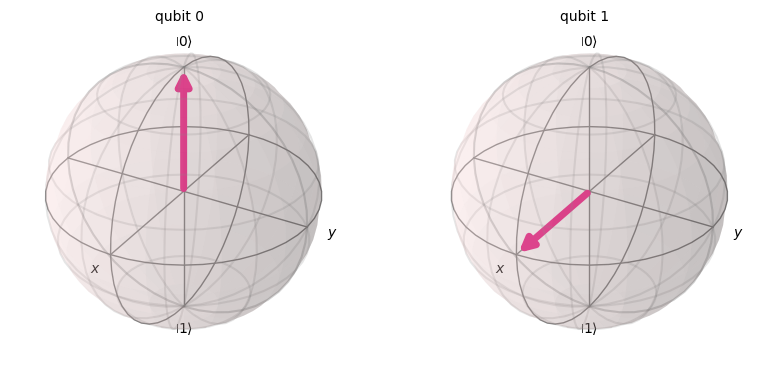

In [ ]:
from qiskit.visualization import plot_bloch_multivector
# Create a Quantum Circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(1)
qc.x(1)
# Visualize the state vector on the Bloch sphere
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()

# Get the statevector
statevector = result.get_statevector(qc)

# Plot the Bloch sphere
plot_bloch_multivector(statevector)

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import depolarizing_error
import numpy as np
import pandas as pd

# Function to apply quantum gate and get the output state with noise
def apply_quantum_gate_with_noise(gate, input_state, noise_model):
    qc = QuantumCircuit(1, 1)  # 1-qubit quantum circuit

    if input_state == 1:
        qc.x(0)  # Initialize to |1> state (X gate to flip to 1)

    # Apply the quantum gate
    if gate == 'X':
        qc.x(0)  # Pauli-X gate (bit-flip)
    elif gate == 'H':
        qc.h(0)  # Hadamard gate

    qc.measure(0, 0)  # Measure the qubit

    # Simulate the quantum circuit with noise
    simulator = Aer.get_backend('qasm_simulator')
    circ = transpile(qc, simulator)

    result = simulator.run(circ, noise_model=noise_model).result()
    counts = result.get_counts(circ)

    # Get the output state from the simulation result
    output_state = int(max(counts, key=counts.get))  # Choose the most frequent output

    return output_state

# Generate synthetic data for quantum gate classification with noise
def generate_quantum_gate_data_with_noise(n_samples=10):
    # Create a noise model with depolarizing error
    noise_model = NoiseModel()
    error = depolarizing_error(0.05, 1)  # 5% depolarizing error for single-qubit gates
    noise_model.add_quantum_error(error, ['x', 'h'], [0])  # Add noise to X and H gates on qubit 0

    data = []
    gates = ['X', 'H']  # Quantum gates (X, Hadamard)

    for _ in range(n_samples):
        # Random binary input state (0 or 1)
        input_state = np.random.choice([0, 1])

        # Randomly choose a quantum gate
        gate = np.random.choice(gates)

        # Get the output state from the quantum circuit simulation
        output_state = apply_quantum_gate_with_noise(gate, input_state, noise_model)

        data.append([input_state, output_state, gate])

    return pd.DataFrame(data, columns=['input_state', 'output_state', 'gate'])

# Create the dataset using Qiskit for gate simulation with noise
data = generate_quantum_gate_data_with_noise()

print(data)


   input_state  output_state gate
0            0             1    X
1            0             1    X
2            0             1    X
3            1             1    H
4            1             0    X
5            0             1    X
6            0             1    X
7            0             1    X
8            0             1    H
9            0             1    X


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error
import numpy as np
import pandas as pd

# Function to apply quantum gate and get the output state with noise
def apply_quantum_gate_with_noise(gate, input_state, noise_model):
    qc = QuantumCircuit(1, 1)  # 1-qubit quantum circuit

    if input_state == 1:
        qc.x(0)  # Initialize to |1> state (X gate to flip to 1)

    # Apply the quantum gate
    if gate == 'X':
        qc.x(0)  # Pauli-X gate (bit-flip)
    elif gate == 'H':
        qc.h(0)  # Hadamard gate

    qc.measure(0, 0)  # Measure the qubit

    # Simulate the quantum circuit with noise
    simulator = AerSimulator()  # Use AerSimulator
    circ = transpile(qc, simulator)

    result = simulator.run(circ, noise_model=noise_model).result()
    counts = result.get_counts(circ)

    # Get the output state from the simulation result
    output_state = int(max(counts, key=counts.get))  # Choose the most frequent output

    return output_state

# Generate synthetic data for quantum gate classification with multiple noise types
def generate_quantum_gate_data_with_noise(n_samples=10):
    # Create a noise model
    noise_model = NoiseModel()

    # Define the errors
    depolarizing_err = depolarizing_error(0.05, 1)  # 5% depolarizing error on 1 qubit
    pauli_err = pauli_error([("X", 0.1), ("I", 0.9)])  # Pauli errors (bit-flip with 10% probability)

    # Add errors to the noise model for gates
    noise_model.add_all_qubit_quantum_error(depolarizing_err, ["H"])
    noise_model.add_all_qubit_quantum_error(pauli_err, ["X"])

    data = []
    gates = ['X', 'H']  # Quantum gates (X, Hadamard)

    for _ in range(n_samples):
        # Random binary input state (0 or 1)
        input_state = np.random.choice([0, 1])

        # Randomly choose a quantum gate
        gate = np.random.choice(gates)

        # Get the output state from the quantum circuit simulation
        output_state = apply_quantum_gate_with_noise(gate, input_state, noise_model)

        data.append([input_state, output_state, gate])

    return pd.DataFrame(data, columns=['input_state', 'output_state', 'gate'])

# Create the dataset using Qiskit for gate simulation with noise
data = generate_quantum_gate_data_with_noise()

print(data)

   input_state  output_state gate
0            1             0    X
1            1             1    H
2            1             1    H
3            1             1    H
4            1             1    H
5            0             1    X
6            1             0    H
7            1             0    X
8            1             0    X
9            0             1    X


Data with Noise:
   input_state  output_state gate
0            0             0    H
1            0             1    X
2            0             1    H
3            0             1    X
4            0             0    H
5            0             1    X
6            0             1    X
7            1             0    X
8            1             0    H
9            1             0    X

Data without Noise:
   input_state  output_state gate
0            0             0    H
1            0             1    X
2            0             0    H
3            0             1    X
4            0             1    H
5            0             1    X
6            0             1    X
7            1             0    X
8            1             1    H
9            1             0    X


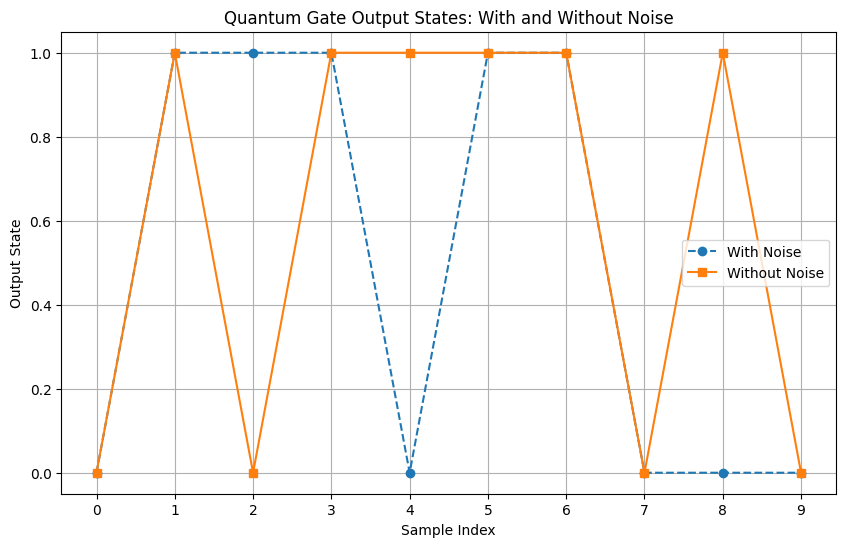

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to apply quantum gate and get the output state
def apply_quantum_gate_with_noise(gate, input_state, noise_model=None):
    qc = QuantumCircuit(1, 1)  # 1-qubit quantum circuit

    if input_state == 1:
        qc.x(0)  # Initialize to |1> state (X gate to flip to 1)

    # Apply the quantum gate
    if gate == 'X':
        qc.x(0)  # Pauli-X gate (bit-flip)
    elif gate == 'H':
        qc.h(0)  # Hadamard gate

    qc.measure(0, 0)  # Measure the qubit

    # Simulate the quantum circuit (with noise if provided)
    simulator = AerSimulator()
    circ = transpile(qc, simulator)
    if noise_model:
        result = simulator.run(circ, noise_model=noise_model).result()
    else:
        result = simulator.run(circ).result()

    counts = result.get_counts(circ)
    # Get the output state from the simulation result
    output_state = int(max(counts, key=counts.get))  # Choose the most frequent output

    return output_state

# Generate synthetic data for quantum gate classification
def generate_quantum_gate_data(inputs, noise_model=None):
    data = []

    for input_state, gate in inputs:
        # Get the output state from the quantum circuit simulation
        output_state = apply_quantum_gate_with_noise(gate, input_state, noise_model)

        data.append([input_state, output_state, gate])

    return pd.DataFrame(data, columns=['input_state', 'output_state', 'gate'])

# Fix the seed for reproducibility
np.random.seed(42)

# Generate random input states and gates
n_samples = 10
random_inputs = [(np.random.choice([0, 1]), np.random.choice(['X', 'H'])) for _ in range(n_samples)]

# Create a noise model
noise_model = NoiseModel()
depolarizing_err = depolarizing_error(0.05, 1)  # 5% depolarizing error
pauli_err = pauli_error([("X", 0.1), ("I", 0.9)])  # 10% bit-flip error
noise_model.add_all_qubit_quantum_error(depolarizing_err, ["H"])
noise_model.add_all_qubit_quantum_error(pauli_err, ["X"])

# Generate datasets with and without noise using the same random inputs
data_with_noise = generate_quantum_gate_data(random_inputs, noise_model=noise_model)
data_without_noise = generate_quantum_gate_data(random_inputs)

# Print the datasets
print("Data with Noise:")
print(data_with_noise)

print("\nData without Noise:")
print(data_without_noise)

# Plot the graph for output states
plt.figure(figsize=(10, 6))

# Plotting output states with noise
plt.plot(data_with_noise.index, data_with_noise['output_state'], marker='o', linestyle='--', label='With Noise')

# Plotting output states without noise
plt.plot(data_without_noise.index, data_without_noise['output_state'], marker='s', linestyle='-', label='Without Noise')

plt.title('Quantum Gate Output States: With and Without Noise')
plt.xlabel('Sample Index')
plt.ylabel('Output State')
plt.xticks(range(n_samples))
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Classifier
model = SVC()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use the dataset (choose with or without noise)
data = data_with_noise

# Convert the 'gate' column to numbers ('H' -> 0, 'X' -> 1)
data['gate'] = data['gate'].map({'H': 0, 'X': 1})

# Features (input_state, output_state) and Target (gate)
X = data[['input_state', 'output_state']]
y = data['gate']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=3)  # Use 3 neighbors
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, thermal_relaxation_error
import numpy as np
import pandas as pd

# Function to apply quantum gate and get the output state with thermal error
def apply_quantum_gate_with_thermal_error(gate, input_state, noise_model):
    qc = QuantumCircuit(1, 1)  # 1-qubit quantum circuit

    if input_state == 1:
        qc.x(0)  # Initialize to |1> state (X gate to flip to 1)

    # Apply the quantum gate
    if gate == 'X':
        qc.x(0)  # Pauli-X gate (bit-flip)
    elif gate == 'H':
        qc.h(0)  # Hadamard gate

    qc.measure(0, 0)  # Measure the qubit

    # Simulate the quantum circuit with noise
    simulator = Aer.get_backend('qasm_simulator')
    circ = transpile(qc, simulator)

    result = simulator.run(circ, noise_model=noise_model).result()
    counts = result.get_counts(circ)

    # Get the output state from the simulation result
    output_state = int(max(counts, key=counts.get))  # Choose the most frequent output

    return output_state

# Generate synthetic data for quantum gate classification with thermal error
def generate_quantum_gate_data_with_thermal_error(n_samples=10):
    data = []
    gates = ['X', 'H']  # Quantum gates (X, Hadamard)

    # Create a noise model
    noise_model = NoiseModel()

    # Define the thermal relaxation error
    thermal_err = thermal_relaxation_error(t1=50, t2=30, time=20)  # Thermal relaxation error with T1=50, T2=30, and time=20

    # Add thermal error to the noise model for both X and H gates
    noise_model.add_all_qubit_quantum_error(thermal_err, ['X', 'H'])

    for _ in range(n_samples):
        # Random binary input state (0 or 1)
        input_state = np.random.choice([0, 1])

        # Randomly choose a quantum gate
        gate = np.random.choice(gates)

        # Get the output state from the quantum circuit simulation with thermal error
        output_state = apply_quantum_gate_with_thermal_error(gate, input_state, noise_model)

        data.append([input_state, output_state, gate])

    return pd.DataFrame(data, columns=['input_state', 'output_state', 'gate'])

# Create the dataset using Qiskit for gate simulation with thermal error
data = generate_quantum_gate_data_with_thermal_error()

print(data)

   input_state  output_state gate
0            1             0    X
1            1             1    H
2            1             0    X
3            1             1    H
4            0             1    X
5            0             1    X
6            0             0    H
7            0             1    X
8            0             1    X
9            0             1    H
